Jon Chun
24 Oct 2021

# **Requirements**

* Must use **Chrome** browser (esp not Safari)
* Use only **plain text** files (no *.rtf, *.doc, etc)

# **Setup and Configuration**

In [ ]:
# VERIFY that you have a GPU-backed Linux VM instance

!nvidia-smi

Wed Dec  7 06:16:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 17.3 MB/s 
     |████████████████████████████████| 7.6 MB 40.5 MB/s 
     |████████████████████████████████| 182 kB 57.8 MB/s 


In [ ]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 175 kB 57.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=3adb4c6b7e5a21bed3214703d8568ec4b65b206608291dc6670b98ced1738805
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [ ]:
!pip install unidecode  # clean-text dependency

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 6.7 MB/s 


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 41.1 MB/s 
     |████████████████████████████████| 110 kB 64.3 MB/s 


In [ ]:
!pip install python-slugify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from slugify import slugify

In [ ]:
# Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

from cleantext import clean
import contractions
from slugify import slugify

from scipy.signal import find_peaks

from google.colab import files



In [ ]:
# Setup matplotlib

# %matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Globals

In [ ]:
# Global Vars

novel_filename_str = ''
novel_title_str = ''
novel_raw_str = ''
novel_clean_str = ''

novel_lines_ls = []
novel_sentences_ls = []
novel_paragraphs_ls = []

# Main (Modin) DataFrame for Novel Sentiments
sentiment_df = pd.DataFrame

TEXT_ENCODING = 'utf-8'

In [ ]:
def verify_novel(anovel_raw_str, anovel_title_str, index_ends=500):
  '''
  INPUT: string in some stage of processing
  OUTPUT: display summary index_ends chars of header/footer for verification
  '''

  print(f'Novel Title: {anovel_title_str}')
  print(f'  Char Len: {len(anovel_raw_str)}')
  print('====================================\n')
  print(f'Beginning:\n\n {anovel_raw_str[:index_ends]}\n\n')
  print('\n------------------------------------')
  print(f'Ending:\n\n {anovel_raw_str[-index_ends:]}\n\n')

In [ ]:
def save_text2txt_and_download(text_obj, file_suffix='_save.txt'):
  '''
  INPUT: text object and suffix to add to output text filename
  OUTPUT: Write text object to text file (both temp VM and download)
  '''

  if type(text_obj) == str:
    print('STEP 1. Processing String Object\n')
    str_obj = text_obj
  elif type(text_obj) == list:
    if (len(text_obj) > 0):
      if type(text_obj[0]) == str:
        print('STEP 1. Processing List of Strings Object\n')
        str_obj = "\n".join(text_obj)
      else:
        print('ERROR: Object is not an List of Strings [save_text2txt_and_download()]')
        return -1
    else:
      print('ERROR: Object is an empty List [save_text2txt_and_download()]')
      return -1
  else:
    print('ERROR: Object Type is neither String nor List [save_text2txt_and_download()]')
    return -1

  datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  # out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
  out_filename = novel_name_str.split('.')[0] + file_suffix

  # Write file to temporary VM filesystem
  print(f'STEP 2. Saving textfile to temporary VM file: {out_filename}\n')
  with open(out_filename, "w") as fp:
    fp.write(str_obj)

  # Download permanent copy of file
  print(f'STEP 3. Downloading permanent copy of textfile: {out_filename}\n')
  files.download(out_filename)

In [ ]:
def save_df2csv_and_download(df_obj, file_suffix='_save.csv', nodate=True):
  '''
  INPUT: DataFrame object and suffix to add to output csv filename
  OUTPUT: Write DataFrame object to csv file (both temp VM and download)
  '''

  if isinstance(df_obj, pd.DataFrame):
    datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    if nodate:
      out_filename = novel_name_str.split('.')[0] + file_suffix
    else:
      out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
    # print(f'STEP 1. Saving DataFrame: {df_obj.__name__} to temporary VM file: {out_filename}\n') # Also, isinstance(obj, pd.DataFrame)
    print(f'STEP 1. Saving DataFrame to temporary VM file: {out_filename}\n')
    df_obj.to_csv(out_filename, index=False) 
  else:
    print(f'ERROR: Object is not a DataFrame [save_df2csv_and_download()]')
    return -1

  # Download permanent copy of file
  print(f'STEP 2. Downloading permanent copy of csvfile: {out_filename}\n')
  files.download(out_filename)


# Test

# save_df2csv_and_download(temp_df, '_bert-nlptown.txt')

In [ ]:
def expand_contractions(input_str):
  '''
  INPUT: long string
  OUTPUT: long string with expanded contractions
  '''

  output_str = contractions.fix(input_str)

  return output_str

"""
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]
"""

'\n# novel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_ls]\nnovel_clean_ls = [contractions.fix(x) for x in novel_ls]\nnovel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_clean_ls]\nnovel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]\n# novel_clean_ls = [re.sub(r"^["\']", "", x) for x in novel_clean_ls]  # re.sub("["\']", "", s)\n# novel_clean_ls = [re.sub(r"["\']$", "", x) for x in novel_clean_ls]\nnovel_clean_ls = [x.encode(\'ascii\',errors=\'ignore\').decode() for x in novel_clean_ls]\n# novel_bin = novel_clean_str.encode(\'ascii\',errors=\'ignore\')\n# novel_clean_str = novel_bin.decode()\n\n[f\'[{x}]\' for x in novel_clean_ls]\n'

# **Get the Novel Text**

## OPTION (a): Upload Raw Textfile

In [ ]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  novel_filename_str = fn

# Extract from Dict and decode binary into char string
novel_raw_str = uploaded[novel_filename_str].decode(TEXT_ENCODING)

Saving tmorrison_songofsolomon.csv to tmorrison_songofsolomon.csv
User uploaded file "tmorrison_songofsolomon.csv" with length 1238419 bytes
CPU times: user 465 ms, sys: 66.8 ms, total: 532 ms
Wall time: 58.9 s


In [ ]:
#@title Enter Novel_Title in the form [Title] by [Author]

Novel_Title = "Song of Solomon by Toni Morrison" #@param {type:"string"}

# Remove illegal filename punctuation
Novel_Title = Novel_Title.replace("'","")
Novel_Title = Novel_Title.replace('"','')
Novel_Title = Novel_Title.replace('.',' ')

novel_title_str = ' '.join([x.capitalize() for x in slugify(Novel_Title).replace('-',' ').split()])
novel_title_str

'Song Of Solomon By Toni Morrison'

In [ ]:
# CHECK: That you've trimmed the header/footer before uploading

print(f'Novel Filename:\n\n  {novel_filename_str}\n\n')

verify_novel(novel_raw_str, novel_title_str)

Novel Filename:

  tmorrison_songofsolomon.csv


Novel Title: Song Of Solomon By Toni Morrison
  Char Len: 1238155

Beginning:

 ,text_raw,text_clean
0,The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of Lake Superior at three oclock.,the north carolina mutual life insurance agent promise to fly from mercy to the other side of lake superior at three of the clock
1,Two days before the event was to take place he tacked a note on the door of his little yellow house:,two day before the event be to take place he tack a note on the door of his little yellow house
2,"At 3:00 p.m. on Wed



------------------------------------
Ending:

 s kneeshe leap
10505,As fleet and bright as a lodestar he wheeled toward Guitar and it did not matter which one of them would give up his ghost in the killing arms of his brother.,a fleet and bright a a lodestar he wheel toward guitar and it do not matt which one of them would give up his ghost in the kill arm of his b

## OPTION (b): Read from gDrive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

MessageError: ignored

In [ ]:
# drive.mount("/gdrive", force_remount=True)

In [ ]:
# CUSTOMIZE: set GDrive path below

%cd ./MyDrive/courses/2021f_iphs200_programming_humanity/code/

In [ ]:
!ls *.txt

In [ ]:
# CUSOTMIZE: set 'novel_filename' to the filename of your novel

# novel_filename = 'jkrowling_1sorcerersstone.txt'
novel_filename_str ='Percy_Jackson_The_Lightning_Thief.txt'

In [ ]:
#@title Enter Novel_Title in the form [Title] by [Author]

Novel_Title = "The Lightening Thief by Percy Jackson" #@param {type:"string"}
novel_title_str = Novel_Title

In [ ]:
# Read file into string

with open(novel_filename_str, "r") as fp:
  novel_raw_str = fp.read() #reading all the content in one step

In [ ]:
# Verify

# CHECK: That you've trimmed the header/footer before uploading

print(f'Novel Filename:\n\n  {novel_filename_str}\n\n')

verify_novel(novel_raw_str, novel_title_str)

In [ ]:
# END

In [ ]:
# Read novel into list of Paragraphs

delimiter = "\n\n"

with open(novel_filename, "r") as fp:
  novel_raw_str = fp.read() #reading all the content in one step
  #using the string methods we split it
  novel_parags_ls = novel_raw_str.split(delimiter)
  novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]

print(f'Paragraph Count: {len(novel_parags_ls)}')

In [ ]:
# Read novel into list of Lines

# may need delimiter

with open(novel_filename, 'r') as fp:
  novel_lines_ls = fp.readlines()

print(f'Line Count: {len(novel_lines_ls)}')

In [ ]:
novel_parags_ls[:10]

In [ ]:
novel_ls[100:110]

In [ ]:
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]

In [ ]:
novel_clean_str = '\n'.join(novel_clean_ls)
print(novel_clean_str[:5000])

In [ ]:
# novel_clean_ls[1] = "THE SILVER SPOON I was born twice: first, as a baby girl, on a remarkably smogless Detroit day in January of 1960; and then again, as a teenage boy, in an emergency room near Petoskey, Michigan, in August of 1974. Specialized readers may have come across me in Dr. Peter Luce’s study, “Gender Identity in 5-Alpha-Reductase Pseudohermaphrodites,” published in theJournal of Pediatric Endocrinology in 1975. Or maybe you’ve seen my photograph in chapter sixteen of the now sadly outdatedGenetics and Heredity."

In [ ]:
# novel_clean_ls.pop(0)

In [ ]:
novel_clean_ls[:10]

In [ ]:
novel_clean_ls[-10:]

In [ ]:
# novel_clean_str = '\n'.join(novel_clean_ls)

# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

# print(novel_clean_str[:5000])

## OPTION (c): Scrape Project Gutenberg

**Goto *https://gutenberg.net.au* and find the *.HTML (not *.TXT) version of your novel**

In [ ]:
from bs4 import BeautifulSoup

import requests

In [ ]:
#@title Enter the URL of your novel at ***gutenberg.net.au***
#@markdown Paste the URL to the ***HTML version*** (not plain text).

Novel_Title = 'Frankenstein by Mary Shelley'  #@param {type: "string"}

Gutenberg_URL = 'https://gutenberg.net.au/ebooks/z00006.html'  #@param {type: "string"}


In [ ]:
# Get raw HTML of novel from Gutenberg.net.au

response=requests.get(Gutenberg_URL)  # TODO: Pass the URL to the .get() method of the requests object
html = response.text

In [ ]:
# View raw HTML that we need to clean up

# TODO: What is the difference between these two outputs?

# Option A: 
html

# Option B:
# print(html)

In [ ]:
# Use HTML <p> to extract text into list of paragraphs

soup = BeautifulSoup(html, "html.parser")


paragraph=soup.find_all("p")  # TODO: get all the <P>Paragraphs</P> 
                                #       see bs4 API ref: https://beautiful-soup-4.readthedocs.io/en/latest/#kinds-of-objects
parag_ls = []
for para in paragraph:
    parag_ls.append(para.text)

print(f'There were {len(parag_ls)} Paragraphs:\n') # TODO how do you get the number of paragraphs in the list parag_ls?

print(f"First 3 Paragraphs: ==============================    \n")
print(f"    {list(print(x) for x in parag_ls[:3])}\n")  # TODO: Give index to retrieve the first 3 paragraphs

print(f"Last 3 Paragraphs: ============================== \n")
print(f"    {list(print(x) for x in parag_ls[-3:])}\n")  # TODO: Give index to retrieve the last 3 paragraphs


In [ ]:
# Concatenate all paragraphs into a single novel string

# For every paragraph, replace all hardcoded \r\n with a single space
parag_flat_ls = [re.sub(r'\r\n', ' ', aparag) for aparag in parag_ls]

# Concatenate all paragraphs into a single string, separated by two \n
novel_raw_str = '\n\n'.join(parag_flat_ls)

print('\nSTART OF NOVEL: -----')
print(novel_raw_str[:1000] + '\n')

print('\nEND OF NOVEL: -----\n')
print(novel_raw_str[-1000:])

**Enter the First and Last several words to use as RegEx for trimming header/footers**

In [ ]:
#@title Enter the first sentence in the body of your novel
sentence_first_str = 'St. Petersburgh, Dec. 11th'  #@param {type: "string"}




In [ ]:
#@title Enter the last sentence in the body of your novel
sentence_last_str = 'waves and lost in darkness and distance.'  #@param {type: "string"}

In [ ]:
# Strip off the header
# novel_clean = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
# ' '.join(novel_clean.partition(sentence_last_str)[:2])[-500:]

In [ ]:
# Strip off the header
novel_raw_str = ' '.join(novel_raw_str.partition(sentence_first_str)[1:])

# Strip off the footer
novel_raw_str = ' '.join(novel_raw_str.partition(sentence_last_str)[:2])

# Verify

print('\nSTART OF CLEAN NOVEL: -----')
print(novel_raw_str[:1000] + '\n')

print('\nEND OF CLEAN NOVEL: -----\n')
print(novel_raw_str[-1000:])

In [ ]:
# END

In [ ]:
# CUSTOMIZE: Set delimiter to one (\n) or two (\n\n) returns

# Read novel into list of Paragraphs

delimiter = "\n\n" # or "\n"

novel_paragraphs_ls = novel_raw_str.split(delimiter)
novel_paragraphs_ls = [x.strip() for x in novel_paragraphs_ls if len(x.strip()) > 2]
novel_paragraphs_ls = [' '.join(x.split()) for x in novel_paragraphs_ls]

print(f'Paragraph Count: {len(novel_paragraphs_ls)}')

In [ ]:
# Verify you have list of paragraphs, not sentences

novel_paragraphs_ls[:15]

In [ ]:
for i,aline in enumerate(novel_paragraphs_ls):
  if (len(aline.strip()) < 5):
    print(f'Line #{i}: {aline}')

In [ ]:
novel_clean_str = '\n'.join(novel_paragraphs_ls)
novel_clean_str[:2000]

# **Split Novel into Sentences**

* https://github.com/zaemyung/sentsplit (CRF: mincut)

* https://github.com/adobe/NLP-Cube and Rank ~15 https://aclanthology.org/K18-2017.pdf

In [ ]:
import nltk

nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
novel_sentences_ls = sent_tokenize(novel_raw_str)

sent_ct = len(novel_sentences_ls)
sent_show = 10

print('\nFirst Sentences: -----\n')
# for i, asent in enumerate(novel_sentences_ls[:sent_show]):
for i, asent in enumerate(novel_sentences_ls[:sent_show]):
  print(f'Sentences #{i}: {asent}')


print('\nLast Sentences: -----\n')
for i, asent in enumerate(novel_sentences_ls[-sent_show:]):
  print(f'Sentences #{sent_ct - (sent_show - i)}: {asent}')


print(f'\n\nThere are {sent_ct} Sentences in the novel')


First Sentences: -----

Sentences #0: ,text_raw,text_clean
0,The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of Lake Superior at three oclock.,the north carolina mutual life insurance agent promise to fly from mercy to the other side of lake superior at three of the clock
1,Two days before the event was to take place he tacked a note on the door of his little yellow house:,two day before the event be to take place he tack a note on the door of his little yellow house
2,"At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on my own wings.
Sentences #1: ",at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing
3,Please forgive me.,please forgive me
4,I loved you all.,i love you all
5,"(signed) Robert Smith,",sign robert smith
6,Ins.,ins
7,agent,agent
8,"Mr. Smith didnt draw as big a crowd as Lindbergh had four years earliernot more than forty or fifty people sho

In [ ]:
# Delete the empty Sentences and those without any alphabetic characters

novel_sentences_ls = [x.strip() for x in novel_sentences_ls if len(x.strip()) > 0]
novel_sentences_ls = [x.strip() for x in novel_sentences_ls if re.search('[a-zA-Z]', x)]
len(novel_sentences_ls)

3720

In [ ]:
# View the shortest Setences

sorted(novel_sentences_ls, key=len)[:100]
# type(min(novel_sentences_ls, key=len))
# novel_sentences_ls[:1000]

['Dead?',
 'Bains.',
 'Bains.',
 'Bains?',
 'Bains.',
 'Bains.',
 'Bains.',
 'Tommy.',
 'Macon.',
 'Macon.',
 'Macon?',
 'Macon?',
 'Macon.',
 'Macon.',
 '",good doe not it\n4917,"Hell, no.',
 '",yassuh boss\n6141,"Yassuh, boss.',
 '",oh no\n6890,"No, thank you, sir.',
 '",helmut go on\n7225,"Horst, move.',
 '",be it baby\n1089,"No, said Hagar.',
 '",still live be she\n6928,"Oh, yes.',
 '",everybody know that grace\n8897,Mr.',
 '",dead be not he\n2354,"Dead, aint he?',
 '",this be for you girl\n5953,"Oh, yes.',
 '",solomon that be who\n10175,"Oh, him.',
 '",be a r y mary\n8855,"Well, excuse me.',
 '",hey that be good\n9218,"Thanks, Omar.',
 '",be serious man\n5549,"Im trying, baby.',
 '",yes he say\n5941,"Yes, this is for you.',
 '",fine thank you\n8780,"Mr. Macon, is it?',
 '",he stomp be not he\n2353,"Dead, aint he?',
 '",bad country boy\n3298,"Bad, bad country.',
 '",sing he would whisper\n6228,"Sing, sing.',
 '",maybe he say\n5799,"Lets hear it, Corrie.',
 '",oh shit\n9115,"Guitar,

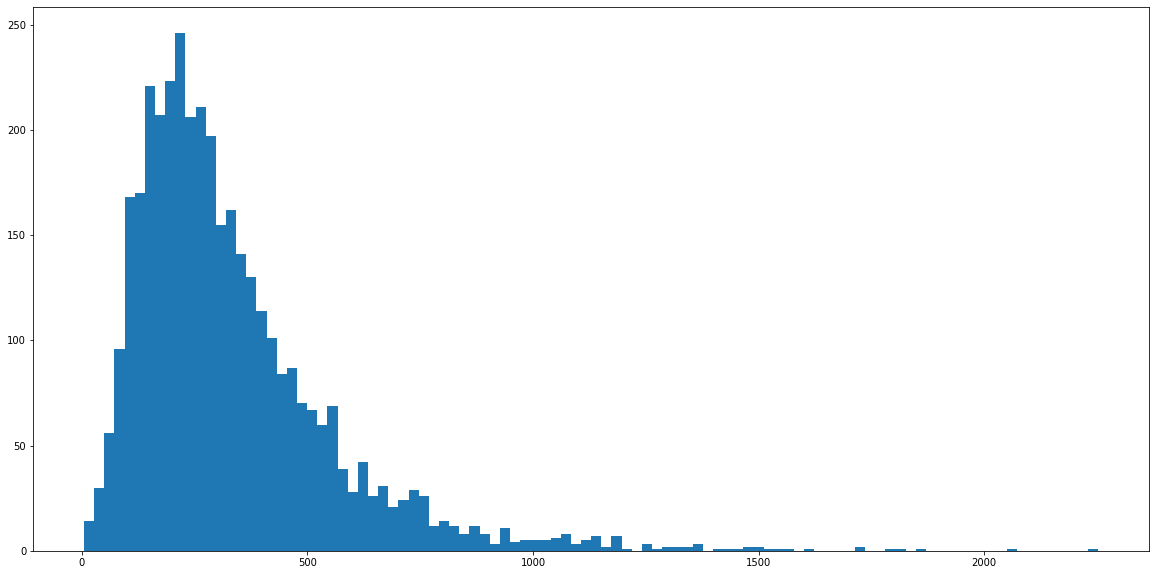

In [ ]:
# View distribution of sentence lengths

_ = plt.hist([len(x) for x in novel_sentences_ls], bins=100)

# **Clean and Slice Strings**

In [ ]:
def clean_str(dirty_str):
  '''
  INPUT: a raw string
  OUTPUT: a clean string
  '''

  contraction_expanded_str = contractions.fix(dirty_str)

  clean_str = clean(contraction_expanded_str,
      fix_unicode=True,               # fix various unicode errors
      to_ascii=True,                  # transliterate to closest ASCII representation
      lower=True,                     # lowercase text
      no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
      no_urls=False,                  # replace all URLs with a special token
      no_emails=False,                # replace all email addresses with a special token
      no_phone_numbers=False,         # replace all phone numbers with a special token
      no_numbers=False,               # replace all numbers with a special token
      no_digits=False,                # replace all digits with a special token
      no_currency_symbols=False,      # replace all currency symbols with a special token
      no_punct=False,                 # remove punctuations
      # replace_with_punct="",          # instead of removing punctuations you may replace them
      # replace_with_url="<URL>",
      # replace_with_email="<EMAIL>",
      # replace_with_phone_number="<PHONE>",
      # replace_with_number="<NUMBER>",
      # replace_with_digit="0",
      # replace_with_currency_symbol="<CUR>",
      lang="en"                       # set to 'de' for German special handling
  )

  # Replace all new lines/returns with single whitespace
  clean_str = ' '.join(clean_str.split())
  # clean_str = clean_str.replace('\n\r', ' ')
  # clean_str = clean_str.replace('\n', ' ')
  # clean_str = clean_str.replace('\r', ' ')
  # clean_str = ' '.join(clean_str.split())

  # Strip unpaired leading/trailing quotes
  if (clean_str.count('"') % 2 == 1):
    clean_str = clean_str.strip('"')
  if (clean_str.count("'") % 2 == 1):
    clean_str = clean_str.strip("'")

  return clean_str 

# Test

clean_str("This \n\n\n is a very dirty DIRTY StrInG!!")
clean_str('"up!')
clean_str('"Watch out!" he said.')

'this is a very dirty dirty string!!'

'up!'

'"watch out!" he said.'

In [ ]:
# Verify

# verify_novel(novel_clean_str, index_ends=500)

In [ ]:
# Create sentiment_df to hold text sentences and corresponding sentiment values

sentiment_df = pd.DataFrame({'text_raw': novel_sentences_ls})
sentiment_df['text_raw'] = sentiment_df['text_raw'].astype('string')
sentiment_df['text_raw'] = sentiment_df['text_raw'].str.strip()

sentiment_df.head()
sentiment_df.info()

,text_raw
0,",text_raw,text_clean 0,The North Carolina Mutu..."
1,""",at p be on wednesday the 18th of february i ..."
2,""",mr smith do not draw a big a crowd a lindber..."
3,""",at that time of day during the middle of the..."
4,""",only the unemployed the self employ and the ..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text_raw  3720 non-null   string
dtypes: string(1)
memory usage: 29.2 KB


In [ ]:
# clean the 'text_raw' column and create the 'text_clean' column

# novel_df['text_clean'] = hero.clean(novel_df['text_raw'])
sentiment_df['text_clean'] = sentiment_df['text_raw'].apply(lambda x: clean_str(x))
sentiment_df['text_clean'] = sentiment_df['text_clean'].astype('string')
sentiment_df['text_raw_len'] = sentiment_df['text_raw'].apply(lambda x: len(x))

sentiment_df.head()
sentiment_df.info()

,text_raw,text_clean,text_raw_len
0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591
1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495
2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346
3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718
4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_raw      3720 non-null   string
 1   text_clean    3720 non-null   string
 2   text_raw_len  3720 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 87.3 KB


In [ ]:
# Drop Sentence if Raw length < 1 (Double check)

# sentiment_df = sentiment_df[sentiment_df['text_raw_len'] > 0]

print(f"\n\nThere are {sentiment_df['text_raw'].isna().sum()} BLANK [text_raw] lines")

print(f"There are {sentiment_df['text_clean'].isna().sum()} BLANK [text_clean] lines")

sentiment_df.shape



There are 0 BLANK [text_raw] lines
There are 0 BLANK [text_clean] lines


(3720, 3)

In [ ]:
sentiment_df.sort_values(by=['text_raw_len']).head(20)

,text_raw,text_clean,text_raw_len
715,Dead?,dead?,5
192,Bains?,bains?,6
188,Bains.,bains.,6
196,Bains.,bains.,6
605,Tommy.,tommy.,6
198,Bains.,bains.,6
184,Bains.,bains.,6
3168,Macon.,macon.,6
3200,Macon?,macon?,6
205,Bains.,bains.,6


# **Sentiment Analysis**

## **VADER**

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 24.8 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

In [ ]:
vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [ ]:
sentiment_df['vader'] = sentiment_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
sentiment_df.head(10)

,text_raw,text_clean,text_raw_len,vader
0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591,0.9538
1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495,0.9300
2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346,0.0000
3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718,0.6124
4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533,-0.7650
5,""",town map register the street a main avenue b...",""",town map register the street a main avenue b...",485,-0.3919
6,""",late when other negroes move there and when ...",""",late when other negroes move there and when ...",544,-0.7579
7,""",then in when color man be be draft a few giv...",""",then in when color man be be draft a few giv...",163,0.0000
8,""",in that way the name acquire a quasi officia...",""",in that way the name acquire a quasi officia...",323,0.0000
9,""",some of the city legislator whose concern fo...",""",some of the city legislator whose concern fo...",680,0.0772


## **TextBlob**

In [ ]:
from textblob import TextBlob

In [ ]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment.polarity)

0.39166666666666666


In [ ]:
sentiment_df['textblob'] = sentiment_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
sentiment_df.head(10)

,text_raw,text_clean,text_raw_len,vader,textblob
0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591,0.9538,0.314583
1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495,0.9300,0.471429
2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346,0.0000,0.100000
3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718,0.6124,0.228000
4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533,-0.7650,0.182857
5,""",town map register the street a main avenue b...",""",town map register the street a main avenue b...",485,-0.3919,0.126799
6,""",late when other negroes move there and when ...",""",late when other negroes move there and when ...",544,-0.7579,-0.105357
7,""",then in when color man be be draft a few giv...",""",then in when color man be be draft a few giv...",163,0.0000,-0.200000
8,""",in that way the name acquire a quasi officia...",""",in that way the name acquire a quasi officia...",323,0.0000,0.150000
9,""",some of the city legislator whose concern fo...",""",some of the city legislator whose concern fo...",680,0.0772,0.125000


## **DistilBERT**

* https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

In [ ]:
# Load tokenizer and model, create trainer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Create class for data preparation

class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_distilbert_sentiment(text_clean_ls, sample_size=10):
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Create DataFrame with texts, predictions, labels, and scores
  # line_no_ls = list(range(len(sentiment_ls)))
  # distilbert_df = pd.DataFrame(list(zip(line_no_ls, text_clean_ls,sentiment_ls,label_ls,score_ls)), columns=['line_no','line','sentiment','label','score'])
  # distilbert_df.head()

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  # print(f'label_ls:\n  {label_ls[:sample_size]}')
  # print(f'score_ls:\n {score_ls[:sample_size]}')

  return sentiment_signed_ls, label_ls

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.54 µs


In [ ]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.', 'This']
sentiment_signed_ls, label_ls = get_distilbert_sentiment(line_ls)

print(f'sentiment_signed_ls:\n  {sentiment_signed_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 5
  Batch size = 8


sentiment_signed_ls:
  [0.9998562, -0.9997524619102478, 0.9998695, 0.95023465, 0.99314415]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    POSITIVE
4    POSITIVE
dtype: object


In [ ]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_distilbert_sentiment(text_clean_ls)

sentiment_df['distilbert'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 3720
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      3720 non-null   string 
 1   text_clean    3720 non-null   string 
 2   text_raw_len  3720 non-null   int64  
 3   vader         3720 non-null   float64
 4   textblob      3720 non-null   float64
 5   distilbert    3720 non-null   float64
dtypes: float64(3), int64(1), string(2)
memory usage: 174.5 KB
CPU times: user 1min 3s, sys: 361 ms, total: 1min 4s
Wall time: 1min 3s


In [ ]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert
0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591,0.9538,0.314583,-0.942458
1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495,0.9300,0.471429,-0.976691
2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346,0.0000,0.100000,-0.996431
3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718,0.6124,0.228000,-0.998534
4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533,-0.7650,0.182857,-0.998177


In [ ]:
filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_tmorrison_songofsolomon.csv] <<<<<


In [ ]:
files.download(filename_sentiment)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Fine-Tuned Sentiment RoBERTa**

* https://huggingface.co/siebert/sentiment-roberta-large-english (RoBERTa Large)

In [ ]:
# Import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
# Load tokenizer and model, create trainer
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/687 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/config.json
Model config RobertaConfig {
  "_name_or_path": "siebert/sentiment-roberta-large-english",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6e

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--siebert--sentiment-roberta-large-english/snapshots/6eac71655a474ee4d6d0eee7fa532300c537856d/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_roberta_sentiment(text_clean_ls, sample_size=10):
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  preds = predictions.predictions.argmax(-1)
  label_ls = pd.Series(preds).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  # Create DataFrame with texts, predictions, labels, and scores
  df = pd.DataFrame(list(zip(text_clean_ls,preds,label_ls,score_ls)), columns=['text','pred','label','score'])
  # df.head()

  # print(f'label_ls:\n  {label_ls[:sample_size]}')
  # print(f'score_ls:\n {score_ls[:sample_size]}')

  return sentiment_signed_ls, label_ls

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [ ]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.']
sentiment_signed_ls, label_ls = get_roberta_sentiment(line_ls)

print(f'sentiment_signed_ls:\n  {sentiment_signed_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 4
  Batch size = 8


sentiment_signed_ls:
  [0.9986568, -0.999409019947052, 0.9987269, -0.9994855523109436]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    NEGATIVE
dtype: object


In [ ]:
%%time

# NOTE: ~20m

text_clean_ls = sentiment_df['text_clean'].to_list()
sentiment_ls, label_ls = get_roberta_sentiment(text_clean_ls)

sentiment_df['roberta'] = sentiment_ls
sentiment_df.head()
sentiment_df.info()

***** Running Prediction *****
  Num examples = 3720
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_raw      3720 non-null   string 
 1   text_clean    3720 non-null   string 
 2   text_raw_len  3720 non-null   int64  
 3   vader         3720 non-null   float64
 4   textblob      3720 non-null   float64
 5   distilbert    3720 non-null   float64
 6   roberta       3720 non-null   float64
dtypes: float64(4), int64(1), string(2)
memory usage: 203.6 KB
CPU times: user 5min 57s, sys: 605 ms, total: 5min 58s
Wall time: 6min 3s


In [ ]:
sentiment_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta
0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591,0.9538,0.314583,-0.942458,0.976718
1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495,0.9300,0.471429,-0.976691,0.989779
2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346,0.0000,0.100000,-0.996431,-0.998775
3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718,0.6124,0.228000,-0.998534,-0.991394
4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533,-0.7650,0.182857,-0.998177,-0.992191


In [ ]:
filename_sentiment = f"novel_sentiment_{slugify(''.join(novel_filename_str.split('.')[:-1]).lower(), separator='_')}.csv"
sentiment_df.to_csv(filename_sentiment)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_sentiment}] <<<<<')



     >>>>> SAVED PLOT TO FILE: [novel_sentiment_tmorrison_songofsolomon.csv] <<<<<


In [ ]:
files.download(filename_sentiment)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Plot Sentiment**

In [ ]:
sentiment_df.insert(0, 'SeqNo', list(range(0, sentiment_df.shape[0])))

In [ ]:
sentiment_df.head()

,SeqNo,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta
0,0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591,0.9538,0.314583,-0.942458,0.976718
1,1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495,0.9300,0.471429,-0.976691,0.989779
2,2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346,0.0000,0.100000,-0.996431,-0.998775
3,3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718,0.6124,0.228000,-0.998534,-0.991394
4,4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533,-0.7650,0.182857,-0.998177,-0.992191


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.2.2


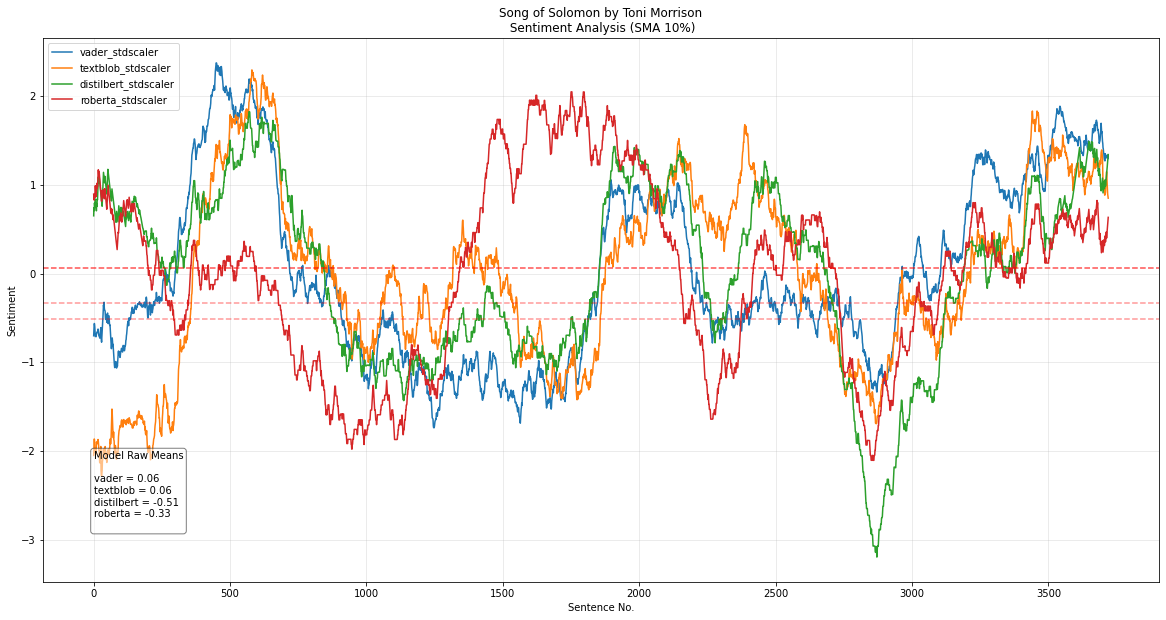

In [ ]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

_ = plt.rcParams['figure.figsize'] = [20, 10]

# Dict of sentiment model means
sentiment_mean_dt = {}

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_per = int(window_percent/100 * sentiment_df.shape[0])

vader_col = f'vader_sma{window_percent}'
sentiment_df[vader_col] = sentiment_df['vader'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['vader'] = sentiment_df['vader'].mean()

textblob_col = f'textblob_sma{window_percent}'
sentiment_df[textblob_col] = sentiment_df['textblob'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['textblob'] = sentiment_df['textblob'].mean()

distilbert_col = f'distilbert_sma{window_percent}'
sentiment_df[distilbert_col] = sentiment_df['distilbert'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['distilbert'] = sentiment_df['distilbert'].mean()

roberta_col = f'roberta_sma{window_percent}'
sentiment_df[roberta_col] = sentiment_df['roberta'].rolling(win_per, center=True, min_periods=1).mean()
sentiment_mean_dt['roberta'] = sentiment_df['roberta'].mean()

# Normalize Time Series to same y-range
sentiment_model_ls = [vader_col, textblob_col, distilbert_col, roberta_col]
sentiment_model_norm_ls = ['vader_stdscaler',
                           'textblob_stdscaler',
                           'distilbert_stdscaler',
                           'roberta_stdscaler']

sentiment_df[sentiment_model_norm_ls] = StandardScaler().fit_transform(sentiment_df[sentiment_model_ls])

sentiment_df.plot(y=sentiment_model_norm_ls, x='SeqNo')

_ = plt.title(f'{Novel_Title}\n Sentiment Analysis (SMA {window_percent}%)')
_ = plt.ylabel('Sentiment')
_ = plt.xlabel('Sentence No.')
_ = plt.grid(True, alpha=0.3)
_ = plt.legend(loc='best')

model_mean_str = 'Model Raw Means\n\n'
for amodel, amean in sentiment_mean_dt.items():
  model_mean_str += f'{amodel} = {amean:.2f}\n'
  _ = plt.axhline(y = amean, label='book', color='red', linestyle='--', alpha=0.4)

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
_ = plt.text(0.05, -2.0, model_mean_str, 
             # transform=plt.transAxes, 
             fontsize=10,
             verticalalignment='top', 
             bbox=props)

_ = plt.show();

# print(sentiment_mean_ls)

In [ ]:
sentiment_df.head()

,SeqNo,text_raw,text_clean,text_raw_len,vader,textblob,distilbert,roberta,vader_sma10,textblob_sma10,distilbert_sma10,roberta_sma10,vader_stdscaler,textblob_stdscaler,distilbert_stdscaler,roberta_stdscaler
0,0,",text_raw,text_clean 0,The North Carolina Mutu...",",text_raw,text_clean 0,the north carolina mutu...",591,0.9538,0.314583,-0.942458,0.976718,0.012753,0.020119,-0.460090,-0.246966,-0.700336,-2.046871,0.649907,0.893688
1,1,""",at p be on wednesday the 18th of february i ...",""",at p be on wednesday the 18th of february i ...",495,0.9300,0.471429,-0.976691,0.989779,0.017239,0.021437,-0.452528,-0.250963,-0.631120,-1.973690,0.741032,0.852259
2,2,""",mr smith do not draw a big a crowd a lindber...",""",mr smith do not draw a big a crowd a lindber...",346,0.0000,0.100000,-0.996431,-0.998775,0.021714,0.023451,-0.455257,-0.253427,-0.562058,-1.861921,0.708153,0.826721
3,3,""",at that time of day during the middle of the...",""",at that time of day during the middle of the...",718,0.6124,0.228000,-0.998534,-0.991394,0.021599,0.023327,-0.448125,-0.246829,-0.563831,-1.868808,0.794099,0.895115
4,4,""",only the unemployed the self employ and the ...",""",only the unemployed the self employ and the ...",533,-0.7650,0.182857,-0.998177,-0.992191,0.019423,0.021450,-0.451007,-0.250788,-0.597415,-1.973002,0.759374,0.854072


# **Crux Detection**

In [ ]:
#@title Which Lexicon?

Sentiment_Model = "RoBERTa" #@param ["VADER", "TextBlob", "DistilBERT", "RoBERTa"]

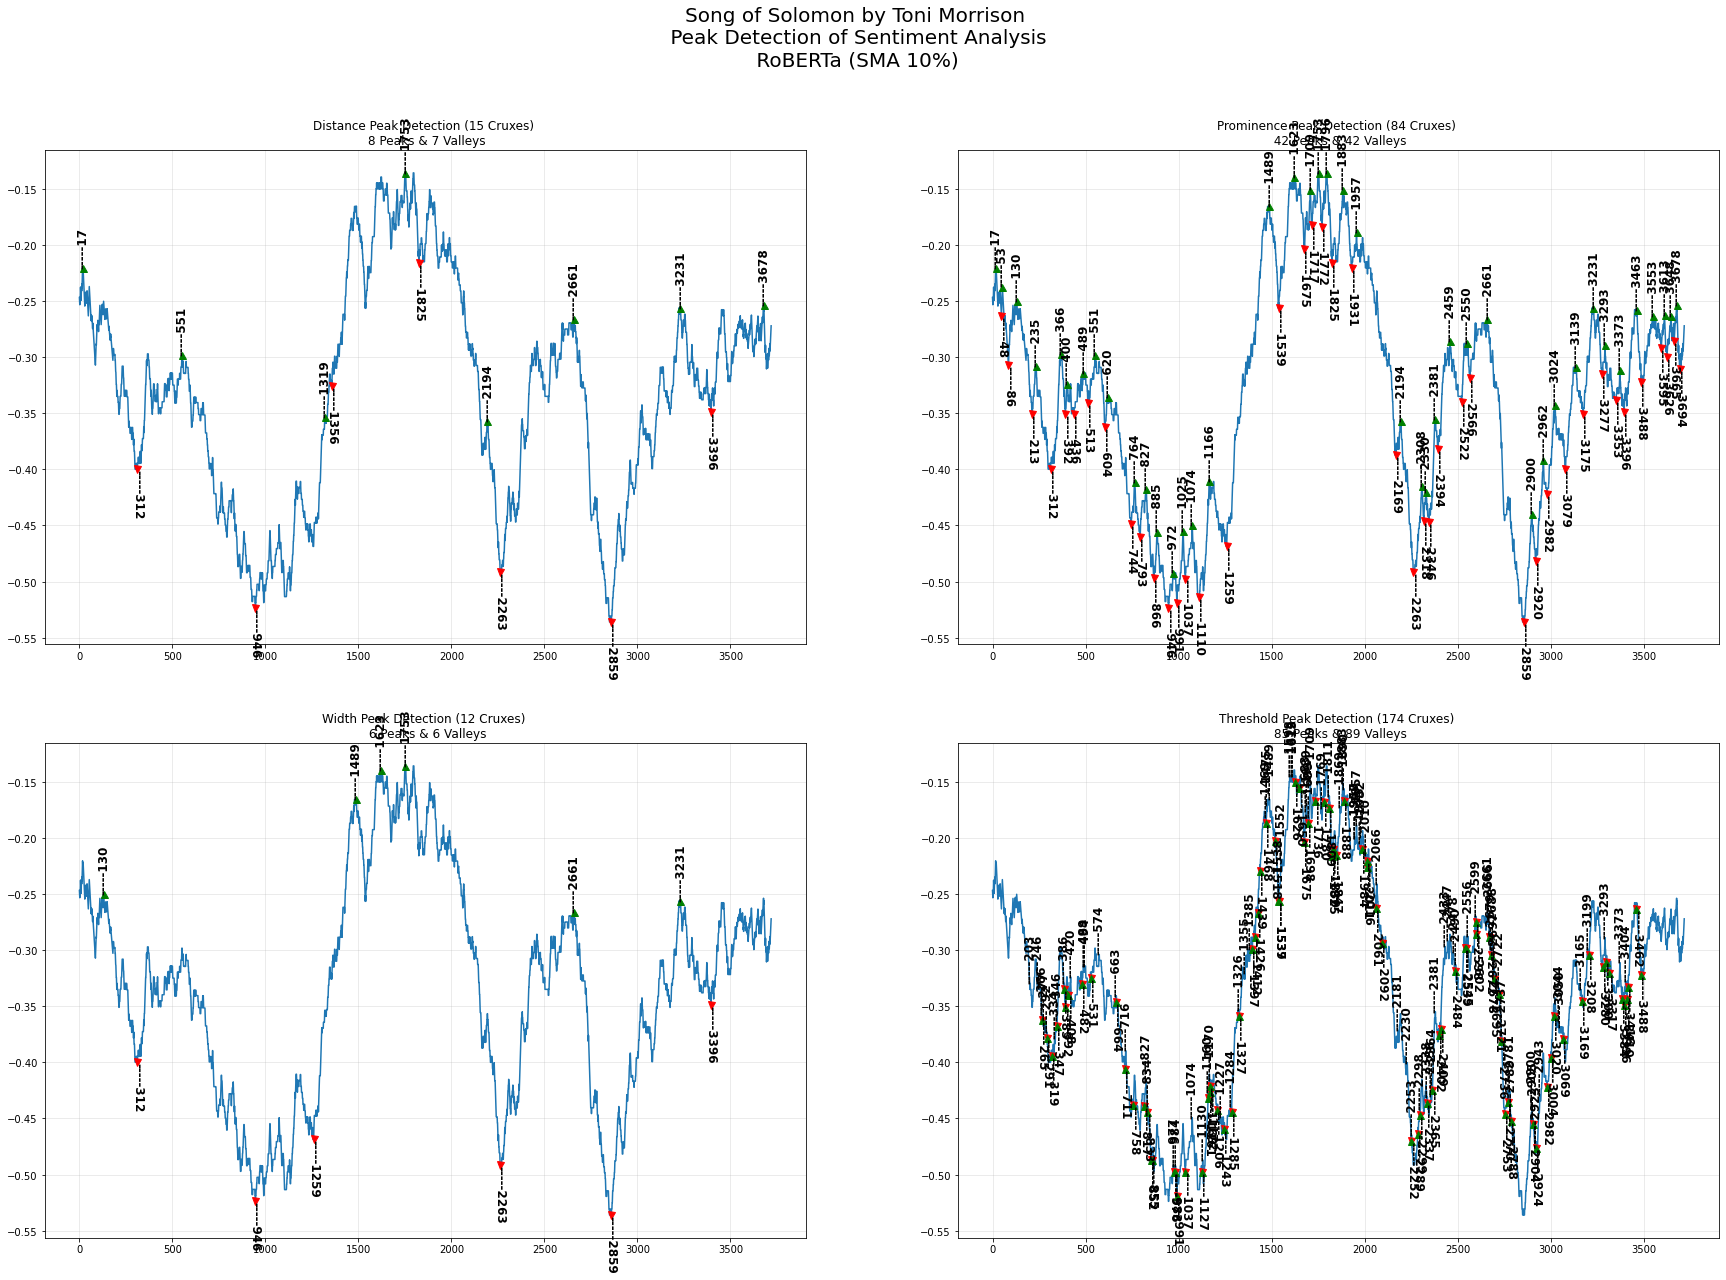

In [ ]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 410 #@param {type:"slider", min:100, max:1000, step:10}
Prominence_Min = 0.022 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 60 #@param {type:"slider", min:25, max:500, step:5}
Threshold_Min = 0.005 #@param {type:"slider", min:0.001, max:0.01, step:0.001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'

x = sentiment_df[model_name]

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in sentiment_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


_ = plt.subplot(2, 2, 1)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Distance Peak Detection ({len(peaks)+len(valleys)} Cruxes) \n {len(peaks)} Peaks & {len(valleys)} Valleys')
_ = plt.plot(peaks, x[peaks], "^g", markersize=7)
_ = plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.subplot(2, 2, 2)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Prominence Peak Detection ({len(peaks2)+len(valleys2)} Cruxes) \n {len(peaks2)} Peaks & {len(valleys2)} Valleys')
_ = plt.plot(peaks2, x[peaks2], "^g", markersize=7)
_ = plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 3)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Width Peak Detection ({len(peaks3)+len(valleys3)} Cruxes) \n {len(peaks3)} Peaks & {len(valleys3)} Valleys')
_ = plt.plot(valleys3, x[valleys3], "vr", markersize=7)
_ = plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 4)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Threshold Peak Detection ({len(peaks4)+len(valleys4)} Cruxes) \n {len(peaks4)} Peaks & {len(valleys4)} Valleys')
_ = plt.plot(valleys4, x[valleys4], "vr", markersize=7)
_ = plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.suptitle(f'{Novel_Title}\n Peak Detection of Sentiment Analysis\n {Sentiment_Model} (SMA {window_percent}%)', fontsize=20)
_ = plt.grid(True, alpha=0.3)

_ = plt.show()

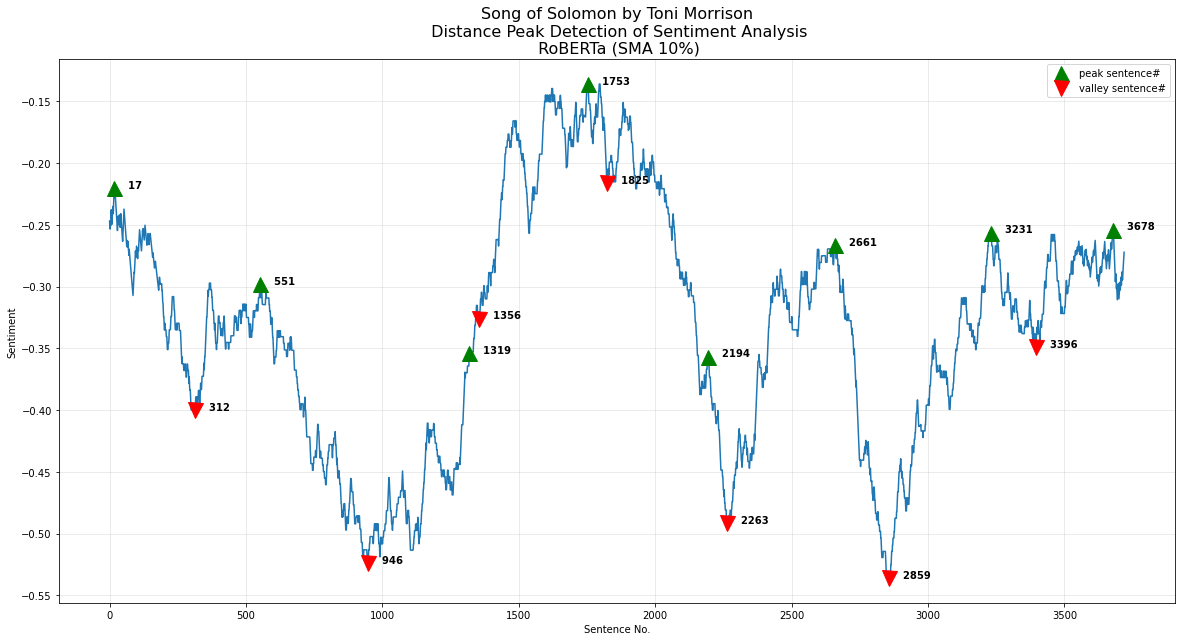



     >>>>> SAVED PLOT TO FILE: [cruxes_plot_Song_of_Solomon_by_Toni_Morrison.png] <<<<<


In [ ]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Distance" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

_ = plt.plot(x)
_ = plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
_ = plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
_ = plt.title(f'{Novel_Title}\n {Peak_Algorithm} Peak Detection of Sentiment Analysis\n {Sentiment_Model} (SMA {window_percent}%)', fontsize=16)
_ = plt.ylabel('Sentiment')
_ = plt.xlabel('Sentence No.')
_ = plt.legend(loc='best')
_ = plt.grid(True, alpha=0.3)

filename_plot = f"cruxes_plot_{Novel_Title.replace(' ', '_')}.png"
_ = plt.savefig(filename_plot, dpi=300)
_ = plt.show();

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

In [ ]:
# Download Crux Point Plot file 'crux_plot.png' to your laptop

files.download(filename_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Get Context around Crux Points**

In [ ]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 19 #@param {type:"slider", min:1, max:20, step:1}


In [ ]:
# Print Context around each Sentiment Peak

output_ls = []

halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('============     Peak Crux Points   ==============')
output_ls.append('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  print(f'Processing Peak #{i}...')
  crux_sents_ls = []
  for sent_idx in range(apeak-halfwin,apeak+halfwin+1):
    sent_cur = sentiment_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = sentiment_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('===========     Crux Valley Points    ============')
output_ls.append('==================================================\n\n')

# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  print(f'Processing Valley #{i}')
  crux_sents_ls = []
  for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
    sent_cur = sentiment_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"cruxes_context_{Novel_Title.replace(' ', '_')}.txt" 

output_str = ' '.join(output_ls)

with open(filename_cruxes, 'w') as f:
    f.write(output_str)

============     Peak Crux Points   ==============


Processing Peak #0...
Peak #0 at Sentence #17:

",in that way the name acquire a quasi official status
17,But not for long.,but not for long
18,"Some of the city legislators, whose concern for appropriate names and the maintenance of the citys landmarks was the principal part of their political life, saw to it that Doctor Street was never used in any official capacity.
",some of the city legislator whose concern for appropriate name and the maintenance of the citys landmark be the principal part of their political life see to it that doctor street be never use in any official capacity
19,"And since they knew that only Southside residents kept it up, they had notices posted in the stores, barbershops, and restaurants in that part of the city saying that the avenue running northerly and southerly from Shore Road fronting the lake to the junction of routes 6 and 2 leading to Pennsylvania, and also running parallel to and between Rutherf

105269

In [ ]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

files.download(filename_cruxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cat $filename_cruxes

================================================== ============     Peak Crux Points   ============== ==================================================

 Peak #0 at Sentence #17:

",in that way the name acquire a quasi official status
17,But not for long.,but not for long
18,"Some of the city legislators, whose concern for appropriate names and the maintenance of the citys landmarks was the principal part of their political life, saw to it that Doctor Street was never used in any official capacity.
",some of the city legislator whose concern for appropriate name and the maintenance of the citys landmark be the principal part of their political life see to it that doctor street be never use in any official capacity
19,"And since they knew that only Southside residents kept it up, they had notices posted in the stores, barbershops, and restaurants in that part of the city saying that the avenue running northerly and southerly from Shore Road fronting the lake to the junction of routes 6

# **END OF NOTEBOOK**